In [1]:
#import all necesaary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data 
df_train = pd.read_csv('finance_dataset/train.csv')
df_test = pd.read_csv('finance_dataset/test.csv')
print(df_train.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [3]:
df_train.shape

(614, 13)

In [4]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [5]:
df_test.shape


(367, 12)

In [6]:
#combine dataset
df = pd.concat([df_train, df_test], axis=0)
#information about missing values and data types of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [7]:
#anaylizing missing value
print(df.isnull().sum())
df.drop('Loan_ID', axis=1,inplace=True)

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64


In [8]:
def get_df_info(df):
    unique_count_num = []
    unique_count = []
    column_name = []
    missing_values = []
    #iterate through columns of df
    for col in df.columns:
        column_name.append(col)
        unique_count_num.append(df[col].nunique())
        unique_count.append(df[col].unique())
        missing_values.append(df[col].isnull().sum())
    
    df_info = pd.DataFrame({'col': column_name, 'num unique': unique_count_num, 'unique values': unique_count, 'missing values': missing_values})
    return df_info
        

In [9]:
df_info = get_df_info(df)
df_info

,col,num unique,unique values,missing values
0,Gender,2,"[Male, Female, nan]",24
1,Married,2,"[No, Yes, nan]",3
2,Dependents,4,"[0, 1, 2, 3+, nan]",25
3,Education,2,"[Graduate, Not Graduate]",0
4,Self_Employed,2,"[No, Yes, nan]",55
5,ApplicantIncome,752,"[5849, 4583, 3000, 2583, 6000, 5417, 2333, 303...",0
6,CoapplicantIncome,437,"[0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, ...",0
7,LoanAmount,232,"[nan, 128.0, 66.0, 120.0, 141.0, 267.0, 95.0, ...",27
8,Loan_Amount_Term,12,"[360.0, 120.0, 240.0, nan, 180.0, 60.0, 300.0,...",20
9,Credit_History,2,"[1.0, 0.0, nan]",79


## detecting missing values and some necessary preprocessing

### code section 1.1

In [10]:

#here majority of data in gender is male so we 
#can think of replacing with it
df.Gender.fillna(value='Male', inplace=True)
#convert data to numerical
df.Gender = df.Gender.astype('category').cat.codes

[1 0]


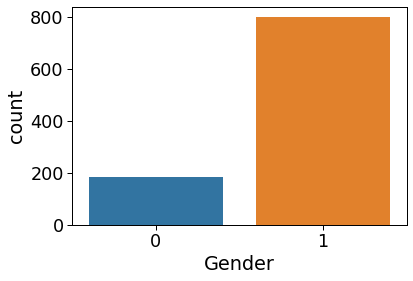

In [11]:
#visualising gender column
sns.set_context(context='paper', font_scale=2)
sns.countplot(data=df, x='Gender')
print(df.Gender.unique())
#1 for male and 0 for female

In [12]:
#now either a person is married or not so there are only
#two poosibilities of replacing the missing value so 
#lets go with majority
df.Married.fillna(value='Yes', inplace=True)
df.Married.isnull().sum()

0

<AxesSubplot:xlabel='Married', ylabel='count'>

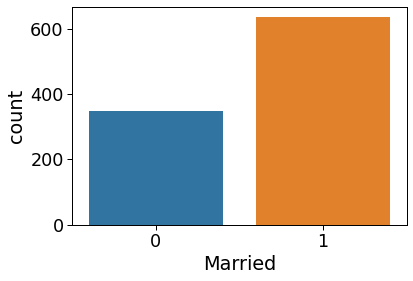

In [13]:
df.Married = df.Married.astype('category').cat.codes
sns.set_context(context='paper', font_scale=2)
sns.countplot(data=df, x='Married')

In [14]:
#dependents column
df.Dependents.value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

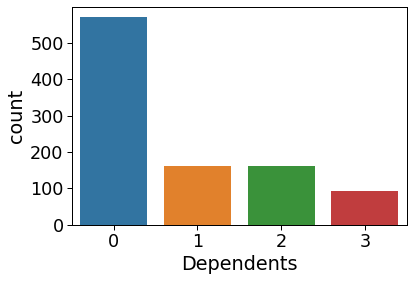

In [15]:
df.Dependents.fillna(value='0', inplace=True)
df.Dependents = df.Dependents.astype('category').cat.codes
sns.set_context(context='paper', font_scale=2)
sns.countplot(data=df, x='Dependents')

<AxesSubplot:xlabel='Education', ylabel='count'>

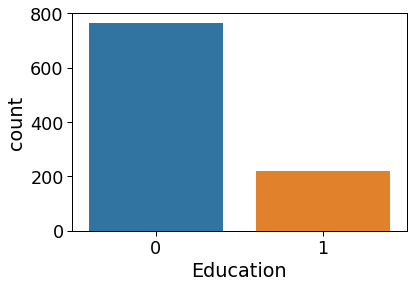

In [16]:
#education column do not have any missing values
#just convert to numeric type
df.Education =df.Education.astype('category').cat.codes
sns.set_context(context='paper', font_scale=2)
sns.countplot(data=df, x='Education')

In [17]:
#self_employed column
df.Self_Employed.value_counts() 

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [18]:
df.Self_Employed.fillna('No', inplace=True)
df.Self_Employed = df.Self_Employed.astype('category').cat.codes

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

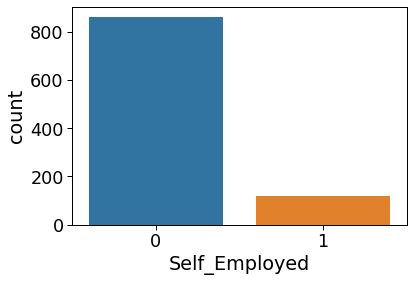

In [19]:
sns.set_context(context='paper', font_scale=2)
sns.countplot(data=df, x='Self_Employed')

In [20]:
#Loan Amount  and Loan_amount term
df.LoanAmount.fillna(value=df.LoanAmount.median(), inplace=True)
df.Loan_Amount_Term.fillna(value=df.Loan_Amount_Term.median(),inplace=True)
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,902.000000
mean,0.814475,0.646279,0.767584,0.222222,0.121305,5179.795107,1601.916330,142.057085,342.564730,0.835920
std,0.388921,0.478368,1.030657,0.415952,0.326648,5695.104533,2718.772806,76.395592,64.482011,0.370553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2875.000000,0.000000,101.000000,360.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5516.000000,2365.000000,160.000000,360.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [21]:
df.Credit_History.value_counts()
df.Credit_History.fillna(1.0, inplace=True)
df.Credit_history = df.Credit_History.astype('category').cat.codes
df.Credit_History.value_counts()

1.0    833
0.0    148
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

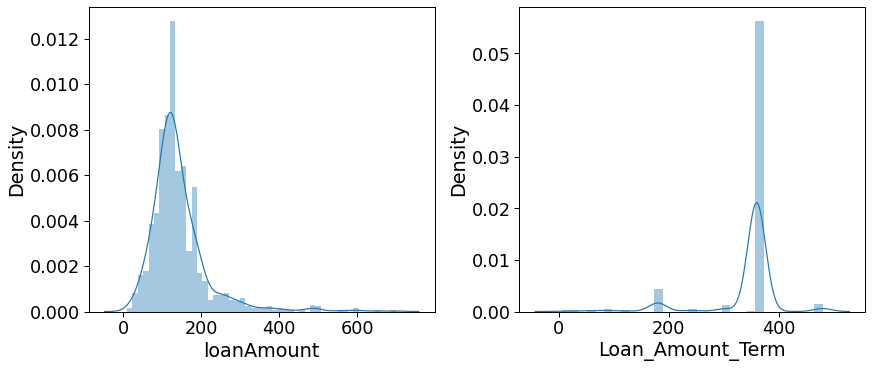

In [22]:

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 5))
ax[0].set_xlabel('loanAmount')
sns.distplot(x=df.LoanAmount, ax=ax[0])
ax[1].set_xlabel('Loan_Amount_Term')
sns.distplot(x=df.Loan_Amount_Term, ax=ax[1])

### outliers removal in continuous variables

### code section 1.2 

<AxesSubplot:xlabel='Loan_Amount_term', ylabel='Loan_Amount_Term'>

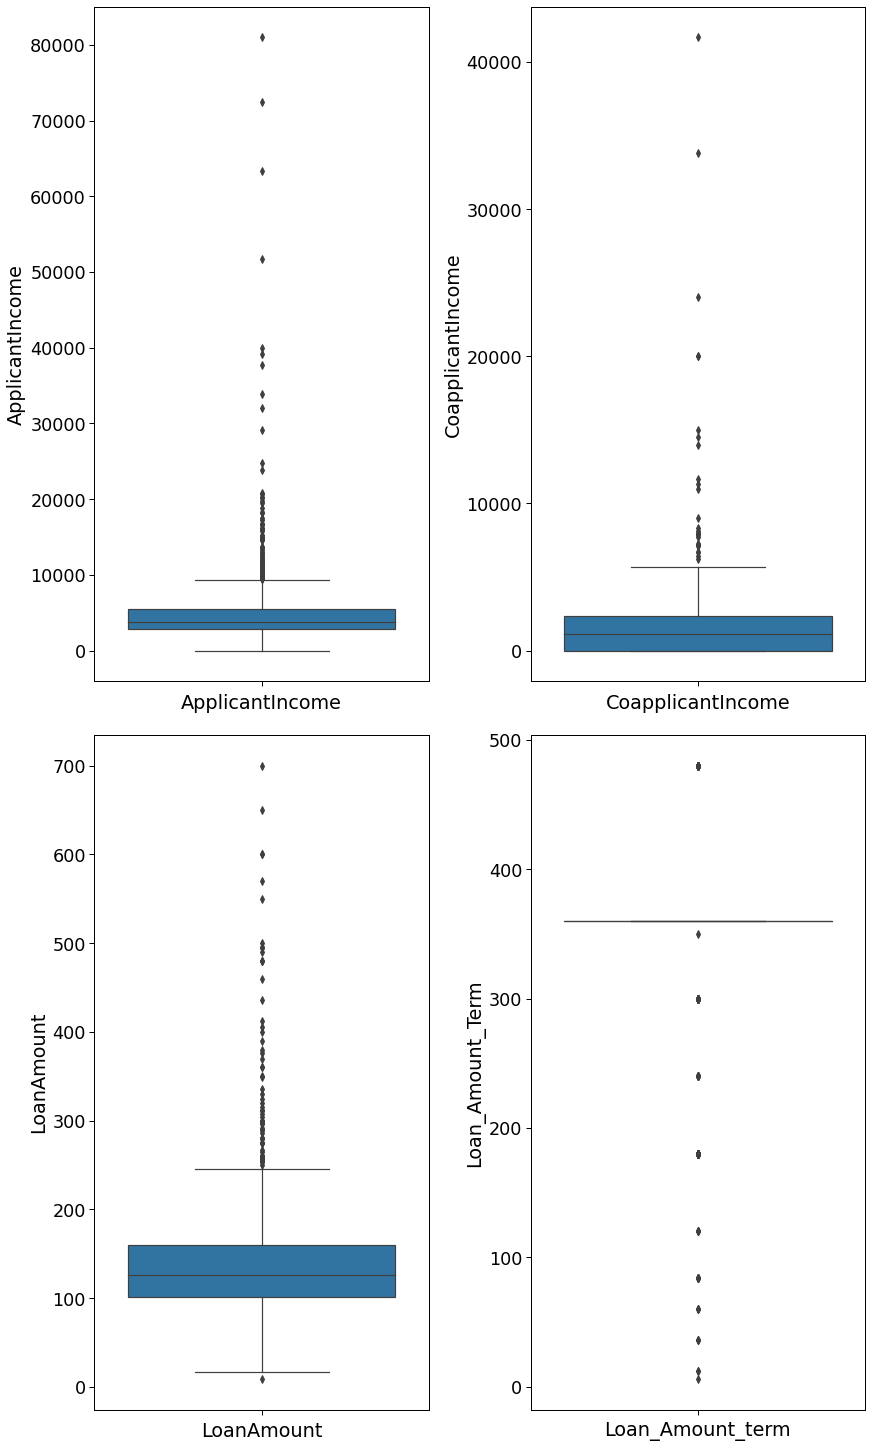

In [23]:
df_con = df.loc[:, ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
#sns.set_context(context='paper', font_scale=2)
fig, ax = plt.subplots(2, 2, constrained_layout=True, figsize=(12, 20))
sns.set_context('paper', font_scale=2)
ax[0, 0].set_xlabel('ApplicantIncome')
sns.boxplot(y = df_con.iloc[:, 0], data=df, ax=ax[0, 0])
ax[0, 1].set_xlabel('CoapplicantIncome')
sns.boxplot(y = df_con.iloc[:, 1], data=df, ax=ax[0, 1])
ax[1, 0].set_xlabel('LoanAmount')
sns.boxplot(y = df_con.iloc[:, 2], data=df, ax=ax[1, 0])
ax[1, 1].set_xlabel('Loan_Amount_term')
sns.boxplot(y = df_con.iloc[:, 3], data=df, ax=ax[1, 1])


In [24]:
df.Loan_Amount_Term.value_counts()

360.0    843
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [25]:
#Loan_Amount_Term column is somewhat constant as most of values are same
#so its not a great idea to remove outliers in Loan_Amount_Term

#all the outliers are on the upper part of box plot
# we must remove them in order to improve our prediction

ApplicantIncome upper bound is: 9477.5
ApplicantIncome lower bound is: -1086.5
	
CoapplicantIncome upper bound is: 5912.5
CoapplicantIncome lower bound is: -3547.5
	
LoanAmount upper bound is: 248.5
LoanAmount lower bound is: 12.5
	


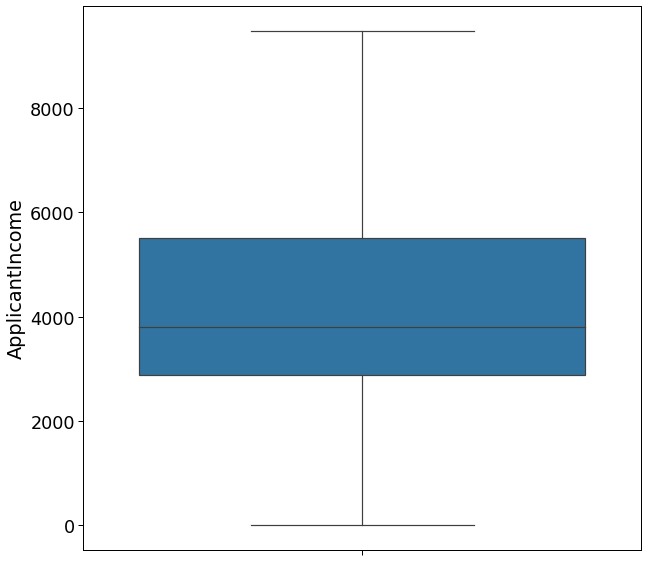

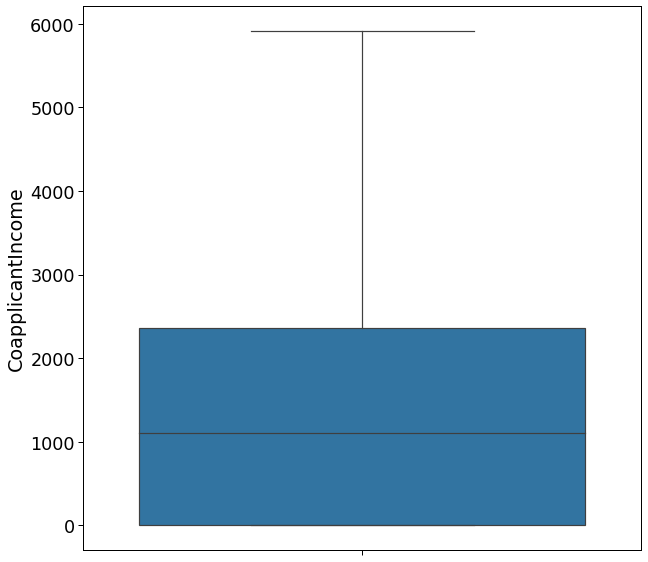

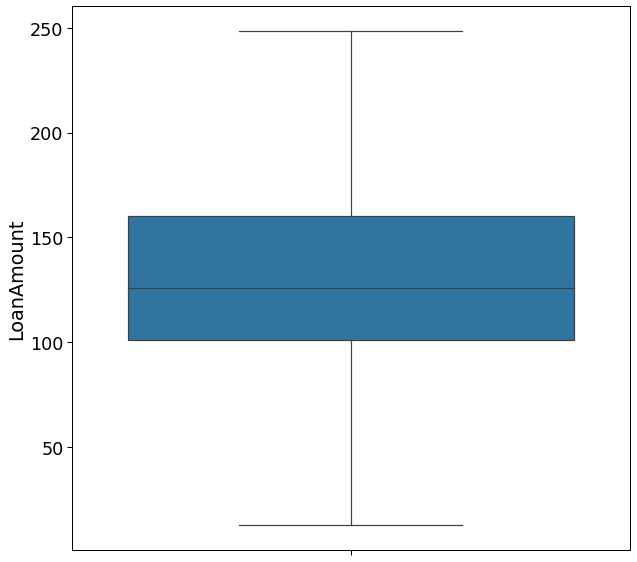

In [26]:

cont_value_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for col in cont_value_columns:
    mean = df[col].mean()
    std = df[col].std()
    #interquantile range
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_bound = df[col].quantile(0.75) + 1.5*iqr
    lower_bound = df[col].quantile(0.25) - 1.5*iqr
    #mask
    mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    #series containing valid values
    df_col_inc_outliers_rem = df[col][~mask]
    #series containing outlier values
    df_col_inc_outliers = df[col][mask]
    mask_upper = df[col] > upper_bound
    mask_lower = df[col] < lower_bound
    #replacing outlier values with mean
    df[col][mask_upper] = upper_bound
    df[col][mask_lower] = lower_bound
    #print(df_col_inc_outliers_rem, df_col_inc_outliers)
    print(f'{col} upper bound is: {upper_bound}\n{col} lower bound is: {lower_bound}')
    print('\t')
    #plot after outliers removal
    plt.figure(figsize=(10, 10))
    sns.boxplot(y=df[col])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

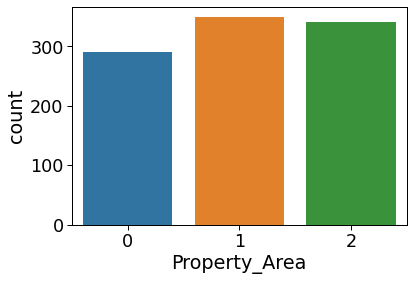

In [27]:
#df.Property_Area.value_counts()
df.Property_Area = df.Property_Area.astype('category').cat.codes
sns.countplot(x=df.Property_Area)


In [28]:
df_train = df.iloc[:614, :]
print(df_train.head(10))
print(df.iloc[614:, :].head(10))


   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0           5849.0   
1       1        1           1          0              0           4583.0   
2       1        1           0          0              1           3000.0   
3       1        1           0          1              0           2583.0   
4       1        0           0          0              0           6000.0   
5       1        1           2          0              1           5417.0   
6       1        1           0          1              0           2333.0   
7       1        1           3          0              0           3036.0   
8       1        1           2          0              0           4006.0   
9       1        1           1          0              0           9477.5   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       126.0             360.0             1.0   
1           

In [29]:
df_train.Loan_Status.value_counts()
df_train.Loan_Status = df_train.Loan_Status.astype('category').cat.codes
df['Loan_Status'] = df_train.Loan_Status
df.Loan_Status.value_counts()

1    675
0    306
Name: Loan_Status, dtype: int64

## EDA
### code section 2.1

### correlation among features

<AxesSubplot:>

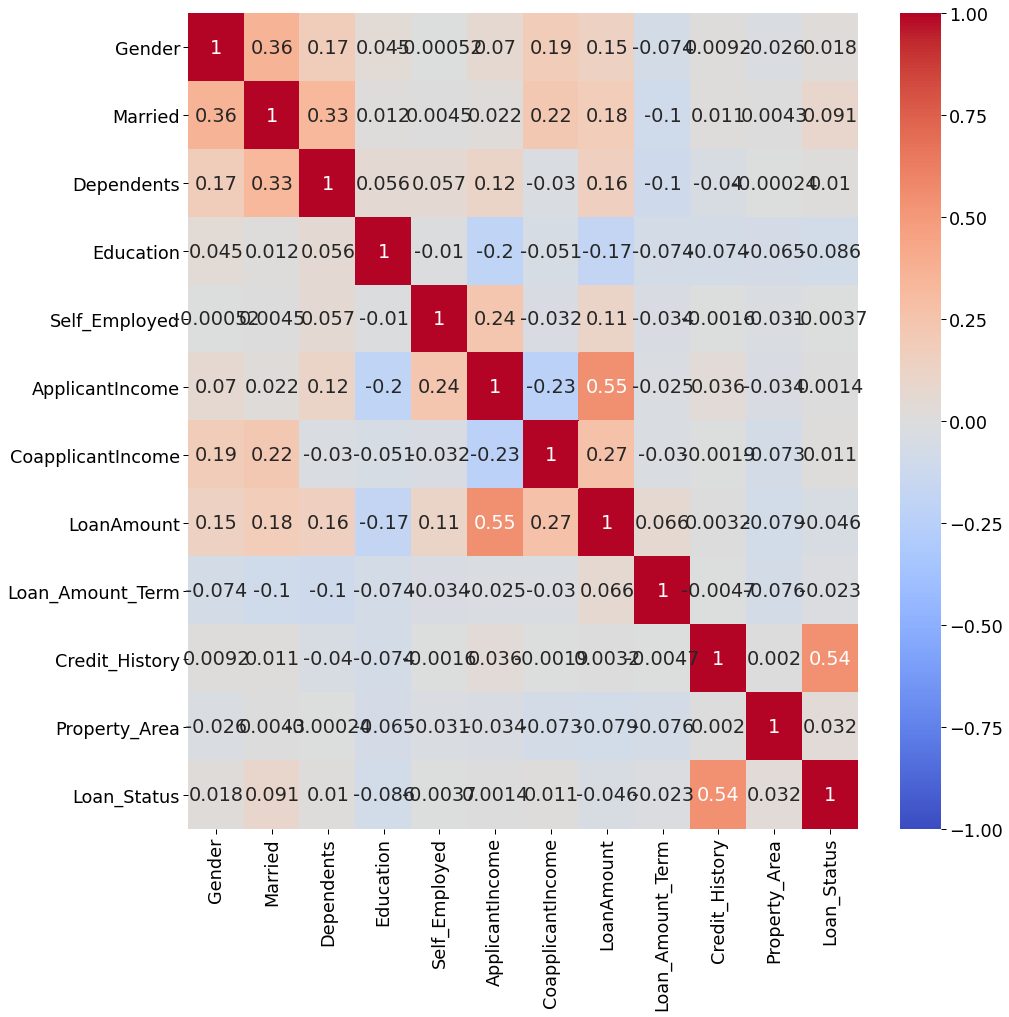

In [30]:
df.Loan_Status = df.Loan_Status.astype('category').cat.codes
plt.figure(figsize=(15, 15))
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

<Figure size 2160x2160 with 0 Axes>

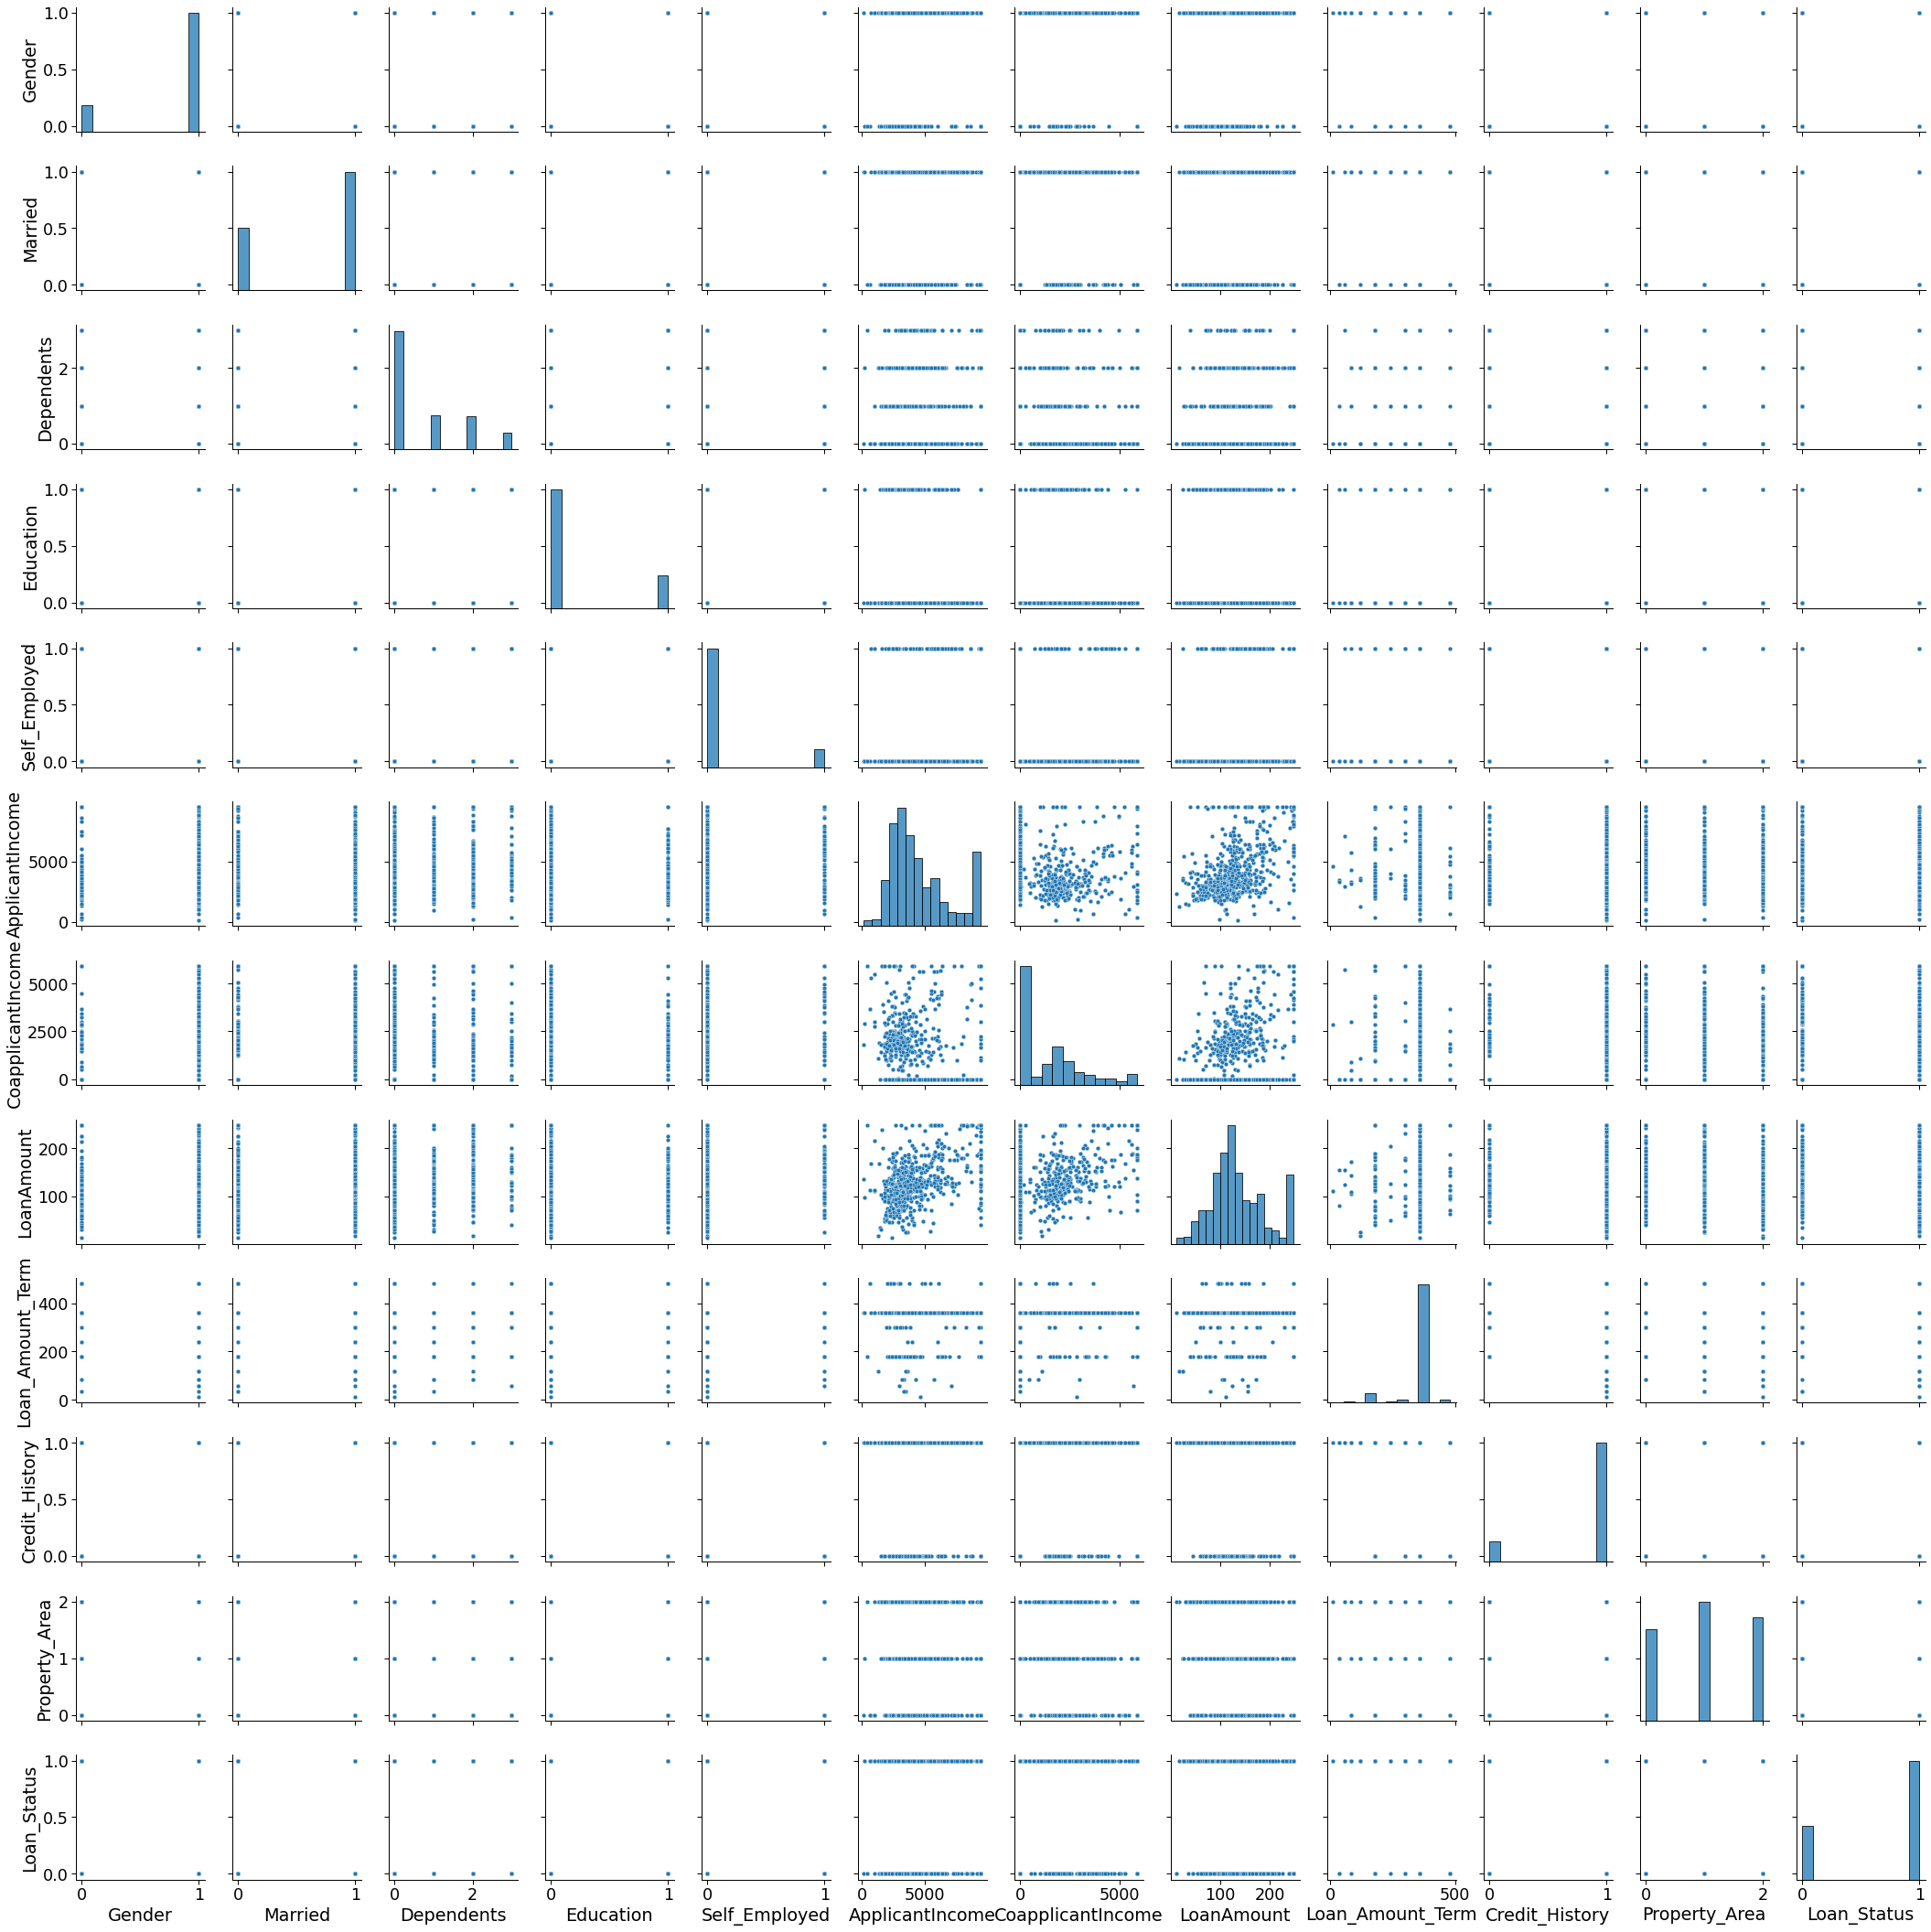

In [31]:
plt.figure(figsize=(30, 30))
sns.pairplot(df_train)
#as size of plot is very large we get no very less idea about data

### code section 2.2

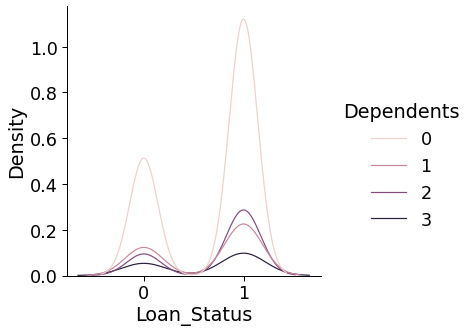

In [32]:
sns.displot(x=df_train.Loan_Status,  hue=df_train.Dependents, kind='kde')
#there is no such result to be noticed from the graph 
#loan_status approval density as well as rejection density 
#decreases with increase in dependents

1    634
0    347
Name: Married, dtype: int64


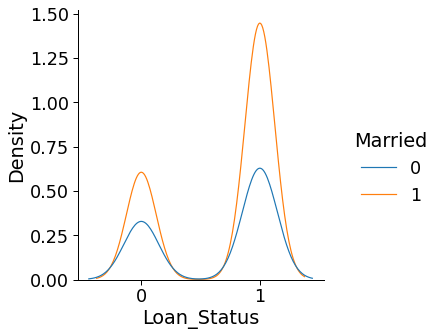

In [33]:
sns.displot(x=df.Loan_Status, kind='kde', hue=df.Married)
print(df.Married.value_counts())
#married has more both loan approval and rejection

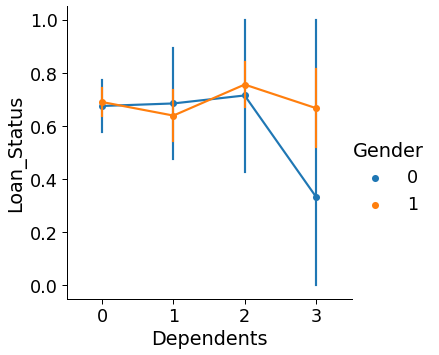

In [34]:
sns.catplot(x='Dependents', y='Loan_Status', data=df_train, hue='Gender', kind='point')
#this plot depicts on average how many people get loan approval
#given certain no of dependents differentiating gender

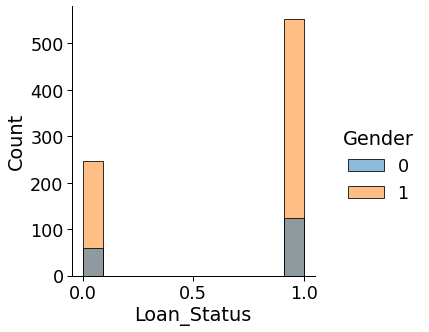

In [35]:
sns.displot(x=df.Loan_Status, hue=df.Gender)
#male has more both loan approval and rejection

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

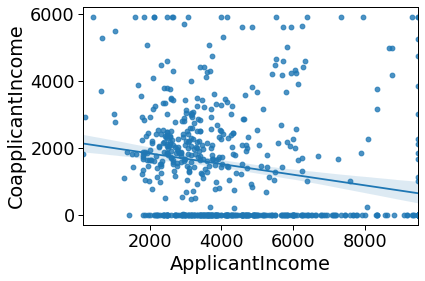

In [36]:
sns.regplot(x='ApplicantIncome', y='CoapplicantIncome', data=df_train)
#on average if applicant income increases ,coapplicant income decreases


<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

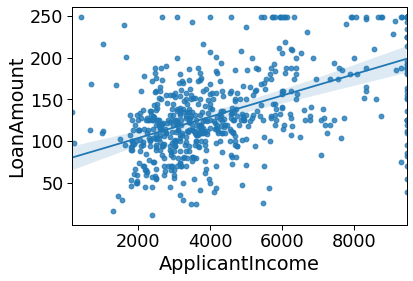

In [37]:
sns.regplot(x='ApplicantIncome', y='LoanAmount', data=df_train, ci=100)
#as applicant income amount applied for loan also increases

## checking for skewness in continuos vaariables
### code section 2.3

<AxesSubplot:ylabel='Density'>

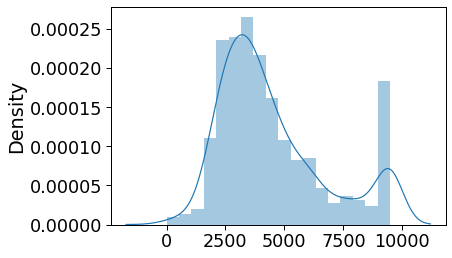

In [38]:
sns.distplot(x=df.ApplicantIncome)

<AxesSubplot:ylabel='Density'>

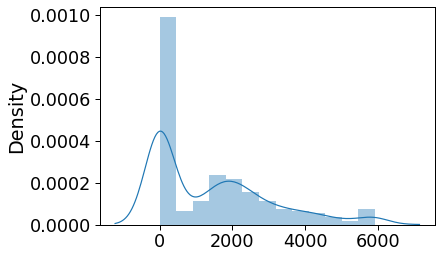

In [39]:
sns.distplot(x=df.CoapplicantIncome)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

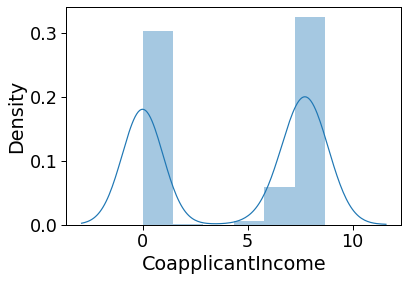

In [40]:
CoapplicantIncome_temp = df.CoapplicantIncome
sns.distplot(np.log1p(CoapplicantIncome_temp))

<AxesSubplot:ylabel='Density'>

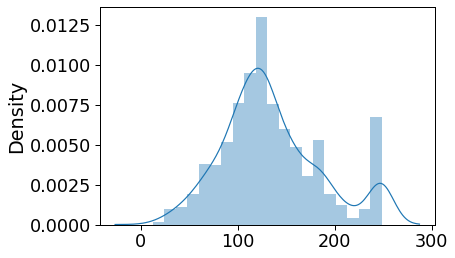

In [41]:
sns.distplot(x=df.LoanAmount)

## modeling
### code section 3.1

In [42]:
#scikit learn module imports
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import balanced_accuracy_score as BAC
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import recall_score as REC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [43]:
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]
X_train_rf1, X_test_rf1, y_train_rf1, y_test_rf1 = train_test_split(X, y, random_state=0, stratify=y)

In [44]:
algorithm_name = []
model_name = []
method_eval = []
feature_count = []
BAC_score = []
REC_score = []
AUC_score = []
special_method = []

In [45]:
def display_performance(algorithm_name, model_name, method_eval, feature_count, BAC_score, REC_score, AUC_score, special_method):
    df_result = pd.DataFrame({'algo': algorithm_name, 'model': model_name, 'what_added': special_method, \
                             'method': method_eval, 'features': feature_count,\
                             'BAC': BAC_score, 'REC': REC_score, 'AUC': AUC_score})
    return df_result

In [46]:
rf1 = RFC()
rf1.fit(X_train_rf1,y_train_rf1)
y_pred_rf1 = rf1.predict(X_test_rf1)
algorithm_name.append('random forest')
model_name.append('rf1')
method_eval.append('train_test_split')
feature_count.append(X_train_rf1.shape[1])
BAC_score.append(BAC(y_pred_rf1, y_test_rf1))
REC_score.append(REC(y_pred_rf1, y_test_rf1))
AUC_score.append(AUC(y_pred_rf1, y_test_rf1))
special_method.append('nothing')

In [47]:
ans = display_performance(algorithm_name, model_name, method_eval, feature_count, BAC_score, REC_score, AUC_score, special_method)
ans

,algo,model,what_added,method,features,BAC,REC,AUC
0,random forest,rf1,nothing,train_test_split,11,0.850118,0.829268,0.850118


In [48]:
rf2 = RFC()
algorithm_name.append('Random forest')
model_name.append('rf2')
method_eval.append('cross_validate')
feature_count.append(X.shape[1])
cv_results = cross_validate(rf2, X, y, scoring=['balanced_accuracy', 'recall', 'roc_auc'], n_jobs=5, verbose=True)
BAC_score.append(cv_results['test_balanced_accuracy'].mean())
REC_score.append(cv_results['test_recall'].mean())
AUC_score.append(cv_results['test_roc_auc'].mean())
special_method.append('nothing')

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    2.1s finished


In [49]:
print(cv_results['test_roc_auc'])

[0.78544892 0.70603715 0.77518315 0.81471306 0.75767544]


In [50]:
cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_balanced_accuracy', 'test_recall', 'test_roc_auc'])

In [51]:
ans = display_performance(algorithm_name, model_name, method_eval, feature_count, BAC_score, REC_score, AUC_score, special_method)
ans

,algo,model,what_added,method,features,BAC,REC,AUC
0,random forest,rf1,nothing,train_test_split,11,0.850118,0.829268,0.850118
1,Random forest,rf2,nothing,cross_validate,11,0.697128,0.931232,0.767812


In [52]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler = StandardScaler()
rf3_std = RFC()
X_std = scaler.fit_transform(X)
algorithm_name.append('random forest')
model_name.append('rf3_std')
method_eval.append('cross_validate')
feature_count.append(X_std.shape[1])
cv_results_std = cross_validate(rf3_std, X_std, y, scoring=['balanced_accuracy', 'recall', 'roc_auc'], n_jobs=5, verbose=True)
BAC_score.append(cv_results_std['test_balanced_accuracy'].mean())
REC_score.append(cv_results_std['test_recall'].mean())
AUC_score.append(cv_results_std['test_roc_auc'].mean())
special_method.append('standardscaler')

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.2s finished


In [53]:
ans = display_performance(algorithm_name, model_name, method_eval, feature_count, BAC_score, REC_score, AUC_score, special_method)
ans

,algo,model,what_added,method,features,BAC,REC,AUC
0,random forest,rf1,nothing,train_test_split,11,0.850118,0.829268,0.850118
1,Random forest,rf2,nothing,cross_validate,11,0.697128,0.931232,0.767812
2,random forest,rf3_std,standardscaler,cross_validate,11,0.702574,0.926471,0.771396


In [54]:
normalizer = Normalizer()
rf4_nor = RFC()
X_nor = normalizer.fit_transform(X)
algorithm_name.append('random forest')
model_name.append('rf4_nor')
method_eval.append('cross_validate')
feature_count.append(X_nor.shape[1])
cv_results_std = cross_validate(rf4_nor, X_nor, y, scoring=['balanced_accuracy', 'recall', 'roc_auc'], n_jobs=5, verbose=True)
BAC_score.append(cv_results_std['test_balanced_accuracy'].mean())
REC_score.append(cv_results_std['test_recall'].mean())
AUC_score.append(cv_results_std['test_roc_auc'].mean())
special_method.append('normalizer')

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.2s finished


In [55]:
ans = display_performance(algorithm_name, model_name, method_eval, feature_count, BAC_score, REC_score, AUC_score, special_method)
ans

,algo,model,what_added,method,features,BAC,REC,AUC
0,random forest,rf1,nothing,train_test_split,11,0.850118,0.829268,0.850118
1,Random forest,rf2,nothing,cross_validate,11,0.697128,0.931232,0.767812
2,random forest,rf3_std,standardscaler,cross_validate,11,0.702574,0.926471,0.771396
3,random forest,rf4_nor,normalizer,cross_validate,11,0.708203,0.916947,0.763424


### feature engineering

### code section 3.2

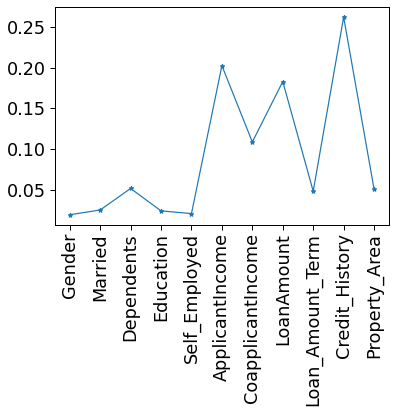

In [56]:
#lets first analyse with random
#forest feature importances
rf5 = RFC().fit(X, y)
rf5.feature_importances_
plt.plot(rf5.feature_importances_, marker='*', linestyle=None)
plt.xticks(labels=X.columns, ticks=list(range(0, 11)), rotation=90)
plt.show()

In [57]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

<AxesSubplot:>

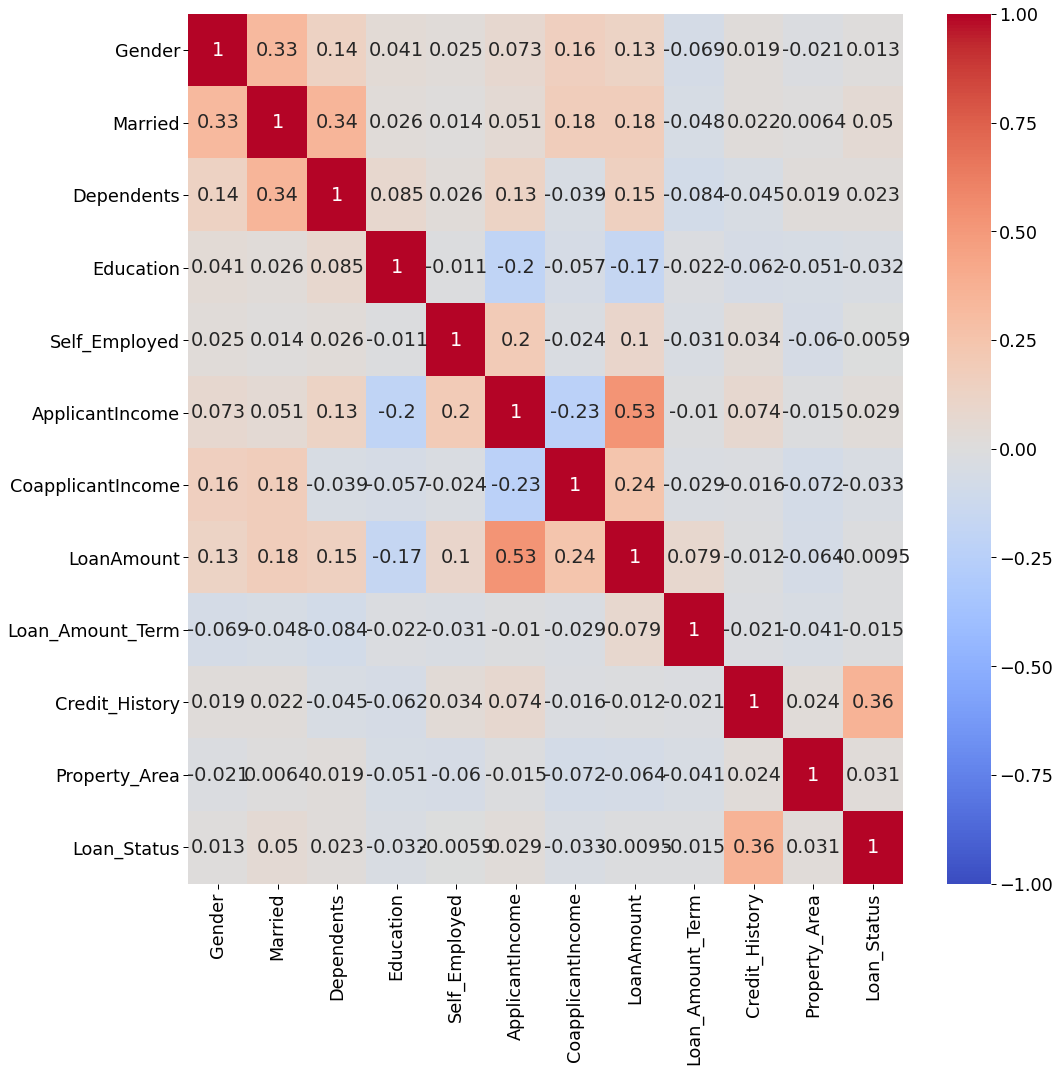

In [58]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

In [59]:
#we will drop married and LoanAmount columns #as they are highly
#correlated with other features we will also #drop self_employed 
#as it is very less significant in our target
X_new = X.drop(['Married', 'Self_Employed', 'LoanAmount'], axis=1)

In [60]:
rf5 = RFC()
algorithm_name.append('Random forest')
model_name.append('rf5')
method_eval.append('cross_validate')
feature_count.append(X_new.shape[1])
cv_results_rf5 = cross_validate(rf5, X_new, y, scoring=['balanced_accuracy', 'recall', 'roc_auc'], n_jobs=5, verbose=True)
BAC_score.append(cv_results_rf5['test_balanced_accuracy'].mean())
REC_score.append(cv_results_rf5['test_recall'].mean())
AUC_score.append(cv_results_rf5['test_roc_auc'].mean())
special_method.append('less features')

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.2s finished


In [61]:
ans = display_performance(algorithm_name, model_name, method_eval, feature_count, BAC_score, REC_score, AUC_score, special_method)
ans

,algo,model,what_added,method,features,BAC,REC,AUC
0,random forest,rf1,nothing,train_test_split,11,0.850118,0.829268,0.850118
1,Random forest,rf2,nothing,cross_validate,11,0.697128,0.931232,0.767812
2,random forest,rf3_std,standardscaler,cross_validate,11,0.702574,0.926471,0.771396
3,random forest,rf4_nor,normalizer,cross_validate,11,0.708203,0.916947,0.763424
4,Random forest,rf5,less features,cross_validate,8,0.693529,0.898123,0.731690


In [62]:
rf6_std = RFC()
X_new_std = scaler.fit_transform(X_new)
algorithm_name.append('Random forest')
model_name.append('rf6_std')
method_eval.append('cross_validate')
feature_count.append(X_new_std.shape[1])
cv_results_rf6_std = cross_validate(rf6_std, X_new_std, y, scoring=['balanced_accuracy', 'recall', 'roc_auc'], n_jobs=5, verbose=True)
BAC_score.append(cv_results_rf6_std['test_balanced_accuracy'].mean())
REC_score.append(cv_results_rf6_std['test_recall'].mean())
AUC_score.append(cv_results_rf6_std['test_roc_auc'].mean())
special_method.append('less features, standardscaler')

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.2s finished


In [63]:
ans = display_performance(algorithm_name, model_name, method_eval, feature_count, BAC_score, REC_score, AUC_score, special_method)
ans

,algo,model,what_added,method,features,BAC,REC,AUC
0,random forest,rf1,nothing,train_test_split,11,0.850118,0.829268,0.850118
1,Random forest,rf2,nothing,cross_validate,11,0.697128,0.931232,0.767812
2,random forest,rf3_std,standardscaler,cross_validate,11,0.702574,0.926471,0.771396
3,random forest,rf4_nor,normalizer,cross_validate,11,0.708203,0.916947,0.763424
4,Random forest,rf5,less features,cross_validate,8,0.693529,0.898123,0.731690
5,Random forest,rf6_std,"less features, standardscaler",cross_validate,8,0.693678,0.898151,0.740485


In [64]:
#lets create some new features
df_train_new = df_train.copy()
df_train_new['total_income'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_train_new['unit_loan_amount'] = (df_train['LoanAmount'])/df_train['Loan_Amount_Term']
df_train_new.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status'], axis=1, inplace=True)

df_train_new

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,total_income,unit_loan_amount
0,1,0,0,0,0,1.0,2,5849.0,0.350000
1,1,1,1,0,0,1.0,0,6091.0,0.355556
2,1,1,0,0,1,1.0,2,3000.0,0.183333
3,1,1,0,1,0,1.0,2,4941.0,0.333333
4,1,0,0,0,0,1.0,2,6000.0,0.391667
...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,2900.0,0.197222
610,1,1,3,0,0,1.0,0,4106.0,0.222222
611,1,1,1,0,0,1.0,2,8312.0,0.690278
612,1,1,2,0,0,1.0,2,7583.0,0.519444


In [65]:
df_train_new.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'total_income', 'unit_loan_amount'],
      dtype='object')

In [66]:
scaler = StandardScaler()
rf7_std = RFC()
X_std = scaler.fit_transform(df_train_new)
algorithm_name.append('random forest')
model_name.append('rf7_std')
method_eval.append('cross_validate')
feature_count.append(df_train_new.shape[1])
cv_results_rf7 = cross_validate(rf7_std, df_train_new, y, scoring=['balanced_accuracy', 'recall', 'roc_auc'], n_jobs=5, verbose=True)
BAC_score.append(cv_results_rf7['test_balanced_accuracy'].mean())
REC_score.append(cv_results_rf7['test_recall'].mean())
AUC_score.append(cv_results_rf7['test_roc_auc'].mean())
special_method.append('new features, StandardScaler')

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


In [67]:
ans = display_performance(algorithm_name, model_name, method_eval, feature_count, BAC_score, REC_score, AUC_score, special_method)
ans

,algo,model,what_added,method,features,BAC,REC,AUC
0,random forest,rf1,nothing,train_test_split,11,0.850118,0.829268,0.850118
1,Random forest,rf2,nothing,cross_validate,11,0.697128,0.931232,0.767812
2,random forest,rf3_std,standardscaler,cross_validate,11,0.702574,0.926471,0.771396
3,random forest,rf4_nor,normalizer,cross_validate,11,0.708203,0.916947,0.763424
4,Random forest,rf5,less features,cross_validate,8,0.693529,0.898123,0.731690
5,Random forest,rf6_std,"less features, standardscaler",cross_validate,8,0.693678,0.898151,0.740485
6,random forest,rf7_std,"new features, StandardScaler",cross_validate,9,0.699757,0.905182,0.738987


## random forest hyperparameter  tuning
### code section 3.3


In [68]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params_dict = {'bootstrap': [True, False], 
            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
            'max_features': ['auto', 'sqrt', 'log2'],
            'min_samples_leaf': [1, 2, 4, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [ 1200, 1400, 1600, 1800, 2000]}

In [69]:
#first we will try to use randomizedsearchcv and use its results further
#in grid search cv to improve our accuracy further otherwise if we
#directly use grid search cv it will take a lot of time
clf_random = RandomizedSearchCV(RFC(), params_dict, cv=3, scoring='roc_auc', n_iter=100, n_jobs=5, verbose=True)
clf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 5, 10,
                                                             20],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1200, 1400, 1600, 1800,
                                                         2000]},
                   scoring='roc_auc', verbose=True)

In [70]:
clf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 90,
 'bootstrap': True}

In [71]:
rf8_std = RFC(n_estimators=1800, min_samples_split= 5, \
             min_samples_leaf=1, max_features='log2', \
             max_depth= 30, bootstrap=True)
X_rf8_std = scaler.fit_transform(X)
algorithm_name.append('random forest')
model_name.append('rf8_std')
method_eval.append('cross_validate')
feature_count.append(X_rf8_std.shape[1])
cv_results_rf8 = cross_validate(rf8_std, X_rf8_std, y, scoring=['balanced_accuracy', 'recall', 'roc_auc'], n_jobs=5, verbose=True)
BAC_score.append(cv_results_rf8['test_balanced_accuracy'].mean())
REC_score.append(cv_results_rf8['test_recall'].mean())
AUC_score.append(cv_results_rf8['test_roc_auc'].mean())
special_method.append('randomised_cv')

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    4.8s finished


In [72]:
ans = display_performance(algorithm_name, model_name, method_eval, feature_count, BAC_score, REC_score, AUC_score, special_method)
ans

,algo,model,what_added,method,features,BAC,REC,AUC
0,random forest,rf1,nothing,train_test_split,11,0.850118,0.829268,0.850118
1,Random forest,rf2,nothing,cross_validate,11,0.697128,0.931232,0.767812
2,random forest,rf3_std,standardscaler,cross_validate,11,0.702574,0.926471,0.771396
3,random forest,rf4_nor,normalizer,cross_validate,11,0.708203,0.916947,0.763424
4,Random forest,rf5,less features,cross_validate,8,0.693529,0.898123,0.731690
5,Random forest,rf6_std,"less features, standardscaler",cross_validate,8,0.693678,0.898151,0.740485
6,random forest,rf7_std,"new features, StandardScaler",cross_validate,9,0.699757,0.905182,0.738987
7,random forest,rf8_std,randomised_cv,cross_validate,11,0.704073,0.950252,0.774609


In [73]:
#we can see that we have improved our model
#so we will  now use grid search cv
rf8_std = RFC(bootstrap=True, max_features='log2')
params_dict = {'n_estimators': [1800, 1900], 'max_depth': [30, 40], 'min_samples_leaf': [1, 2], 'min_samples_split': [5, 10]}
clf_grid = GridSearchCV(rf8_std, params_dict, cv=5, n_jobs=5, verbose=True, scoring='roc_auc')
clf_grid.fit(X_rf8_std, y)
print(clf_grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1900}


In [74]:
rf8_std_grid = RFC(n_estimators=1900, min_samples_split= 5, \
             min_samples_leaf=1, max_features='auto', \
             max_depth= 30, bootstrap=True)
X_rf8_std = scaler.fit_transform(X)
algorithm_name.append('random forest')
model_name.append('rf8_std_grid')
method_eval.append('cross_validate')
feature_count.append(X_rf8_std.shape[1])
cv_results_rf8 = cross_validate(rf8_std, X_rf8_std, y, scoring=['balanced_accuracy', 'recall', 'roc_auc'],
                                n_jobs=5, verbose=True)
BAC_score.append(cv_results_rf8['test_balanced_accuracy'].mean())
REC_score.append(cv_results_rf8['test_recall'].mean())
AUC_score.append(cv_results_rf8['test_roc_auc'].mean())
special_method.append('gridSearchcv')

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.2s finished


In [75]:
print(algorithm_name, model_name, method_eval, feature_count, BAC_score, REC_score, AUC_score)

['random forest', 'Random forest', 'random forest', 'random forest', 'Random forest', 'Random forest', 'random forest', 'random forest', 'random forest'] ['rf1', 'rf2', 'rf3_std', 'rf4_nor', 'rf5', 'rf6_std', 'rf7_std', 'rf8_std', 'rf8_std_grid'] ['train_test_split', 'cross_validate', 'cross_validate', 'cross_validate', 'cross_validate', 'cross_validate', 'cross_validate', 'cross_validate', 'cross_validate'] [11, 11, 11, 11, 8, 8, 9, 11, 11] [0.8501180173092053, 0.6971277174837548, 0.7025740255616417, 0.708203483822679, 0.6935285612220596, 0.6936775195908322, 0.6997570283173998, 0.7040734188412207, 0.7020867780310505] [0.8292682926829268, 0.9312324929971989, 0.9264705882352942, 0.9169467787114846, 0.8981232492997199, 0.8981512605042017, 0.9051820728291317, 0.9502521008403362, 0.9360224089635855] [0.8501180173092052, 0.7678115443208323, 0.7713964681689139, 0.7634240295308408, 0.7316904818607604, 0.7404853101834525, 0.7389873628263721, 0.7746094686187566, 0.7699147945277977]


### logistic regression

### code section 4.1

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr1 = LogisticRegression()
algorithm_name.append('logistic regression')
model_name.append('lr1')
feature_count.append(X.shape[1])
method_eval.append('cross_validate')
cv_results_lr1 = cross_validate(lr1, X, y, cv=5, n_jobs=5, verbose=True, scoring=['balanced_accuracy', 'recall', 'roc_auc'])
BAC_score.append(cv_results_lr1['test_balanced_accuracy'].mean())
REC_score.append(cv_results_lr1['test_recall'].mean())
AUC_score.append(cv_results_lr1['test_roc_auc'].mean())
special_method.append('nothing')

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


In [78]:
ans = display_performance(algorithm_name, model_name, method_eval, feature_count, BAC_score, REC_score, AUC_score, special_method)
ans

,algo,model,what_added,method,features,BAC,REC,AUC
0,random forest,rf1,nothing,train_test_split,11,0.850118,0.829268,0.850118
1,Random forest,rf2,nothing,cross_validate,11,0.697128,0.931232,0.767812
2,random forest,rf3_std,standardscaler,cross_validate,11,0.702574,0.926471,0.771396
3,random forest,rf4_nor,normalizer,cross_validate,11,0.708203,0.916947,0.763424
4,Random forest,rf5,less features,cross_validate,8,0.693529,0.898123,0.731690
5,Random forest,rf6_std,"less features, standardscaler",cross_validate,8,0.693678,0.898151,0.740485
6,random forest,rf7_std,"new features, StandardScaler",cross_validate,9,0.699757,0.905182,0.738987
7,random forest,rf8_std,randomised_cv,cross_validate,11,0.704073,0.950252,0.774609
8,random forest,rf8_std_grid,gridSearchcv,cross_validate,11,0.702087,0.936022,0.769915
9,logistic regression,lr1,nothing,cross_validate,11,0.703879,0.981036,0.737229


In [79]:
X_std = scaler.transform(X)
lr2 = LogisticRegression()
algorithm_name.append('logistic regression')
model_name.append('lr2_std')
feature_count.append(X_std.shape[1])
method_eval.append('cross_validate')
cv_results_lr2 = cross_validate(lr2, X_std, y, cv=5, n_jobs=5, verbose=True,\
                                scoring=['balanced_accuracy', 'recall', 'roc_auc'])
BAC_score.append(cv_results_lr2['test_balanced_accuracy'].mean())
REC_score.append(cv_results_lr2['test_recall'].mean())
AUC_score.append(cv_results_lr2['test_roc_auc'].mean())
special_method.append('standardscaler')

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


In [80]:
ans = display_performance(algorithm_name, model_name, method_eval, feature_count, BAC_score, REC_score, AUC_score, special_method)
ans

,algo,model,what_added,method,features,BAC,REC,AUC
0,random forest,rf1,nothing,train_test_split,11,0.850118,0.829268,0.850118
1,Random forest,rf2,nothing,cross_validate,11,0.697128,0.931232,0.767812
2,random forest,rf3_std,standardscaler,cross_validate,11,0.702574,0.926471,0.771396
3,random forest,rf4_nor,normalizer,cross_validate,11,0.708203,0.916947,0.763424
4,Random forest,rf5,less features,cross_validate,8,0.693529,0.898123,0.731690
5,Random forest,rf6_std,"less features, standardscaler",cross_validate,8,0.693678,0.898151,0.740485
6,random forest,rf7_std,"new features, StandardScaler",cross_validate,9,0.699757,0.905182,0.738987
7,random forest,rf8_std,randomised_cv,cross_validate,11,0.704073,0.950252,0.774609
8,random forest,rf8_std_grid,gridSearchcv,cross_validate,11,0.702087,0.936022,0.769915
9,logistic regression,lr1,nothing,cross_validate,11,0.703879,0.981036,0.737229


[[ 82   7]
 [110 415]]


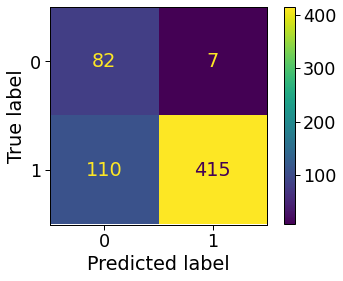

In [81]:
#visualising our results
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(LogisticRegression(), X_std, y, cv=10)
cm = confusion_matrix(y_pred, y)
print(cm)
ConfusionMatrixDisplay(cm).plot()

In [82]:
#clearly recall is very high for the model
#but precision is quite low
from sklearn.metrics import accuracy_score as AS
AS(y_pred, y)

0.8094462540716613

In [83]:
##lets try to improve our logistic regression model by dropping co- related features

In [84]:

X_new = X.drop(['Self_Employed', 'Education', 'LoanAmount', 'Married'], axis=1)
X_new_std = scaler.fit_transform(X_new)
lr3_std = LogisticRegression()
algorithm_name.append('logistic regression')
model_name.append('lr3_std')
feature_count.append(X_new_std.shape[1])
method_eval.append('cross_validate')
cv_results_lr3_std = cross_validate(lr3_std, X_new_std, y, cv=10, n_jobs=5, verbose=True,\
                                scoring=['balanced_accuracy', 'recall', 'roc_auc'])
BAC_score.append(cv_results_lr3_std['test_balanced_accuracy'].mean())
REC_score.append(cv_results_lr3_std['test_recall'].mean())
AUC_score.append(cv_results_lr3_std['test_roc_auc'].mean())
special_method.append('less features, standardscaler')

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished


[[ 82   7]
 [110 415]]


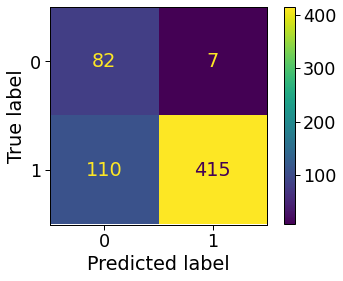

In [85]:
y_pred = cross_val_predict(LogisticRegression(), X_new_std, y, cv=10)
cm = confusion_matrix(y_pred, y)
print(cm)
ConfusionMatrixDisplay(cm).plot()

### trying polynomial features with logisitc regression as this does not easily overfit

In [86]:
from sklearn.preprocessing import PolynomialFeatures as PF
pf = PF(2)
X_new = pf.fit_transform(X)
cv_results_lr3 = cross_validate(lr3_std, X_new, y, cv=10, \
                                scoring=['accuracy', 'balanced_accuracy', 'roc_auc', 'recall'], \
                               verbose=True, n_jobs=5)
print(cv_results_lr3['test_recall'].mean(), cv_results_lr3['test_roc_auc'].mean(), cv_results_lr3['test_balanced_accuracy'].mean())


0.9786267995570321 0.5536147053680713 0.5024712945153581


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished


In [87]:
#it is not providing any better results so lets avoid it using further

## hyperparameter tuning
### code section 4.2

In [88]:
#randomisedSearchcv in logistic regression
lr4 = LogisticRegression()
X_std = scaler.fit_transform(X)
params_dict = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], \
              'penalty': ['l1', 'l2', 'elasticnet', 'none'], \
              'C': [0.001, 0.01, 0.1, 1, 10], \
              'class_weight': ['balanced', 'none']}
clf_random = RandomizedSearchCV(lr4, params_dict, n_iter=100, cv=3, scoring='roc_auc', verbose=True, n_jobs=True)
clf_random.fit(X_std, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100,
                   n_jobs=True,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'class_weight': ['balanced', 'none'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=True)

In [89]:
clf_random.best_params_

{'solver': 'saga', 'penalty': 'l1', 'class_weight': 'balanced', 'C': 10}

In [90]:
algorithm_name.append('logistic regression')
model_name.append('lr4_std')
feature_count.append(X_std.shape[1])
method_eval.append('cross_validate')
cv_results_lr4_std = cross_validate(lr4, X_std, y, cv=5, n_jobs=5, verbose=True,\
                                scoring=['balanced_accuracy', 'recall', 'roc_auc'])
BAC_score.append(cv_results_lr4_std['test_balanced_accuracy'].mean())
REC_score.append(cv_results_lr4_std['test_recall'].mean())
AUC_score.append(cv_results_lr4_std['test_roc_auc'].mean())
special_method.append('randomSearchcv')

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


In [91]:
ans = display_performance(algorithm_name, model_name, method_eval, feature_count, BAC_score, REC_score, AUC_score, special_method)
ans

,algo,model,what_added,method,features,BAC,REC,AUC
0,random forest,rf1,nothing,train_test_split,11,0.850118,0.829268,0.850118
1,Random forest,rf2,nothing,cross_validate,11,0.697128,0.931232,0.767812
2,random forest,rf3_std,standardscaler,cross_validate,11,0.702574,0.926471,0.771396
3,random forest,rf4_nor,normalizer,cross_validate,11,0.708203,0.916947,0.763424
4,Random forest,rf5,less features,cross_validate,8,0.693529,0.898123,0.731690
5,Random forest,rf6_std,"less features, standardscaler",cross_validate,8,0.693678,0.898151,0.740485
6,random forest,rf7_std,"new features, StandardScaler",cross_validate,9,0.699757,0.905182,0.738987
7,random forest,rf8_std,randomised_cv,cross_validate,11,0.704073,0.950252,0.774609
8,random forest,rf8_std_grid,gridSearchcv,cross_validate,11,0.702087,0.936022,0.769915
9,logistic regression,lr1,nothing,cross_validate,11,0.703879,0.981036,0.737229


In [92]:
#it does not improve our model so we will avoid using it 

In [93]:
X_new = X.drop(['Self_Employed', 'Married', 'Education'], axis=1)

In [94]:
lr5 = LogisticRegression()
X_new_std = scaler.fit_transform(X_new)
algorithm_name.append('logistic regression')
model_name.append('lr5_std')
feature_count.append(X_new_std.shape[1])
method_eval.append('cross_validate')
cv_results_lr5_std = cross_validate(lr5, X_new_std, y, cv=5, n_jobs=5, verbose=True,\
                                scoring=['balanced_accuracy', 'recall', 'roc_auc'])
BAC_score.append(cv_results_lr5_std['test_balanced_accuracy'].mean())
REC_score.append(cv_results_lr5_std['test_recall'].mean())
AUC_score.append(cv_results_lr5_std['test_roc_auc'].mean())
special_method.append('less features')

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


In [95]:
ans = display_performance(algorithm_name, model_name, method_eval, feature_count, BAC_score, REC_score, AUC_score, special_method)
ans

,algo,model,what_added,method,features,BAC,REC,AUC
0,random forest,rf1,nothing,train_test_split,11,0.850118,0.829268,0.850118
1,Random forest,rf2,nothing,cross_validate,11,0.697128,0.931232,0.767812
2,random forest,rf3_std,standardscaler,cross_validate,11,0.702574,0.926471,0.771396
3,random forest,rf4_nor,normalizer,cross_validate,11,0.708203,0.916947,0.763424
4,Random forest,rf5,less features,cross_validate,8,0.693529,0.898123,0.731690
5,Random forest,rf6_std,"less features, standardscaler",cross_validate,8,0.693678,0.898151,0.740485
6,random forest,rf7_std,"new features, StandardScaler",cross_validate,9,0.699757,0.905182,0.738987
7,random forest,rf8_std,randomised_cv,cross_validate,11,0.704073,0.950252,0.774609
8,random forest,rf8_std_grid,gridSearchcv,cross_validate,11,0.702087,0.936022,0.769915
9,logistic regression,lr1,nothing,cross_validate,11,0.703879,0.981036,0.737229


## resampling of data

### code section 5.1

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

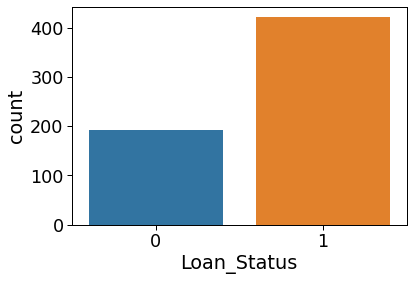

In [96]:
sns.countplot(x=df_train.Loan_Status)

In [97]:
df_train.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
smote = SMOTE(sampling_strategy='auto')
X_sm, y_sm = smote.fit_sample(X, y)
X_sm.Credit_History = X_sm.Credit_History.astype('category').cat.codes
X_sm.dtypes

Gender                  int8
Married                 int8
Dependents              int8
Education               int8
Self_Employed           int8
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History          int8
Property_Area           int8
dtype: object

In [100]:
y_sm.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [101]:
rf9 = RFC()
cv_results_rf9 = cross_validate(rf9, X_sm, y_sm, scoring=['balanced_accuracy', 'recall', 'roc_auc'],\
                                                      cv=5, verbose=True, n_jobs=5, return_estimator=True)
print(cv_results_rf9['test_roc_auc'].mean(), cv_results_rf9['test_recall'].mean())

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


0.9077887821795386 0.8742016806722688


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.3s finished


In [102]:

algorithm_name.append('random forest')
model_name.append('rf9')
feature_count.append(X_sm.shape[1])
method_eval.append('cross_validate')
BAC_score.append(cv_results_rf9['test_balanced_accuracy'].mean())
REC_score.append(cv_results_rf9['test_recall'].mean())
AUC_score.append(cv_results_rf9['test_roc_auc'].mean())
special_method.append('resampling')

In [103]:
ans = display_performance(algorithm_name, model_name, method_eval, feature_count, BAC_score, REC_score, AUC_score, special_method)
ans

,algo,model,what_added,method,features,BAC,REC,AUC
0,random forest,rf1,nothing,train_test_split,11,0.850118,0.829268,0.850118
1,Random forest,rf2,nothing,cross_validate,11,0.697128,0.931232,0.767812
2,random forest,rf3_std,standardscaler,cross_validate,11,0.702574,0.926471,0.771396
3,random forest,rf4_nor,normalizer,cross_validate,11,0.708203,0.916947,0.763424
4,Random forest,rf5,less features,cross_validate,8,0.693529,0.898123,0.731690
5,Random forest,rf6_std,"less features, standardscaler",cross_validate,8,0.693678,0.898151,0.740485
6,random forest,rf7_std,"new features, StandardScaler",cross_validate,9,0.699757,0.905182,0.738987
7,random forest,rf8_std,randomised_cv,cross_validate,11,0.704073,0.950252,0.774609
8,random forest,rf8_std_grid,gridSearchcv,cross_validate,11,0.702087,0.936022,0.769915
9,logistic regression,lr1,nothing,cross_validate,11,0.703879,0.981036,0.737229


In [104]:
X_sm.Credit_History = X_sm.Credit_History.astype('category').cat.codes
X_sm.dtypes

Gender                  int8
Married                 int8
Dependents              int8
Education               int8
Self_Employed           int8
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History          int8
Property_Area           int8
dtype: object

In [105]:
lr6 = LogisticRegression()
cv_results_lr6 = cross_validate(lr6, X_sm, y_sm, scoring=['accuracy', 'balanced_accuracy', 'recall', 'roc_auc'],\
                                                      cv=5, verbose=True, n_jobs=5)

algorithm_name.append('logistic regression')
model_name.append('lr6')
feature_count.append(X_sm.shape[1])
method_eval.append('cross_validate')
BAC_score.append(cv_results_lr6['test_balanced_accuracy'].mean())
REC_score.append(cv_results_lr6['test_recall'].mean())
AUC_score.append(cv_results_lr6['test_roc_auc'].mean())
special_method.append('resampling')

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


In [106]:
ans = display_performance(algorithm_name, model_name, method_eval, feature_count, BAC_score, REC_score, AUC_score, special_method)
ans

,algo,model,what_added,method,features,BAC,REC,AUC
0,random forest,rf1,nothing,train_test_split,11,0.850118,0.829268,0.850118
1,Random forest,rf2,nothing,cross_validate,11,0.697128,0.931232,0.767812
2,random forest,rf3_std,standardscaler,cross_validate,11,0.702574,0.926471,0.771396
3,random forest,rf4_nor,normalizer,cross_validate,11,0.708203,0.916947,0.763424
4,Random forest,rf5,less features,cross_validate,8,0.693529,0.898123,0.731690
5,Random forest,rf6_std,"less features, standardscaler",cross_validate,8,0.693678,0.898151,0.740485
6,random forest,rf7_std,"new features, StandardScaler",cross_validate,9,0.699757,0.905182,0.738987
7,random forest,rf8_std,randomised_cv,cross_validate,11,0.704073,0.950252,0.774609
8,random forest,rf8_std_grid,gridSearchcv,cross_validate,11,0.702087,0.936022,0.769915
9,logistic regression,lr1,nothing,cross_validate,11,0.703879,0.981036,0.737229


In [107]:
(cv_results.keys())

dict_keys(['fit_time', 'score_time', 'test_balanced_accuracy', 'test_recall', 'test_roc_auc'])

[[266  43]
 [156 379]]


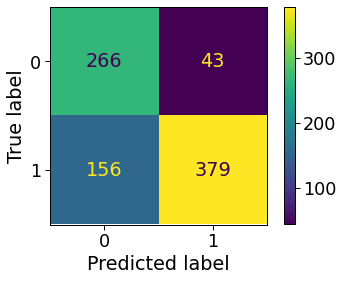

In [108]:
#visualising our results
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(LogisticRegression(), X_sm, y_sm, cv=10)
cm = confusion_matrix(y_pred, y_sm)
print(cm)
ConfusionMatrixDisplay(cm).plot()

## best models
### code section 5.2

[[ 86  19]
 [106 403]]
              precision    recall  f1-score   support

           0       0.45      0.82      0.58       105
           1       0.95      0.79      0.87       509

    accuracy                           0.80       614
   macro avg       0.70      0.81      0.72       614
weighted avg       0.87      0.80      0.82       614



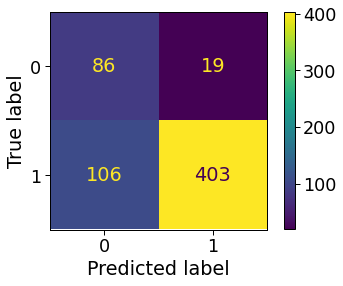

In [109]:
# rf8_std_grid performance
y_pred = cross_val_predict(rf8_std_grid, X, y, cv=10)
cm = confusion_matrix(y_pred, y)
print(cm)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_pred, y))

[[315  41]
 [107 381]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       356
           1       0.90      0.78      0.84       488

    accuracy                           0.82       844
   macro avg       0.82      0.83      0.82       844
weighted avg       0.84      0.82      0.83       844



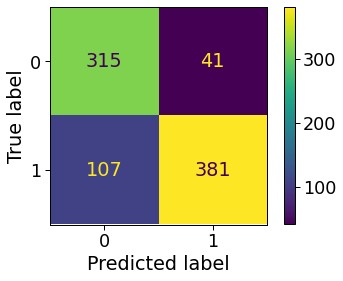

In [110]:
#rf9 performance
y_pred = cross_val_predict(rf8_std_grid, X_sm, y_sm, cv=10)
cm = confusion_matrix(y_pred, y_sm)
print(cm)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_pred, y_sm))

## prediction
### code section 5.3

In [111]:
df_test_final = df.iloc[614:, :]


In [112]:
df_test_final['Loan_ID'] = df_test.Loan_ID
df_test_final.Loan_Status.value_counts()


1    253
0    114
Name: Loan_Status, dtype: int64

In [113]:
#final prediction
df_test_final

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_ID
0,1,1,0,0,0,5720.0,0.0,110.0,360.0,1.0,2,1,LP001015
1,1,1,1,0,0,3076.0,1500.0,126.0,360.0,1.0,2,0,LP001022
2,1,1,2,0,0,5000.0,1800.0,208.0,360.0,1.0,2,1,LP001031
3,1,1,2,0,0,2340.0,2546.0,100.0,360.0,1.0,2,1,LP001035
4,1,0,0,1,0,3276.0,0.0,78.0,360.0,1.0,2,1,LP001051
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009.0,1777.0,113.0,360.0,1.0,2,1,LP002971
363,1,1,0,0,0,4158.0,709.0,115.0,360.0,1.0,2,1,LP002975
364,1,0,0,0,0,3250.0,1993.0,126.0,360.0,1.0,1,1,LP002980
365,1,1,0,0,0,5000.0,2393.0,158.0,360.0,1.0,0,0,LP002986


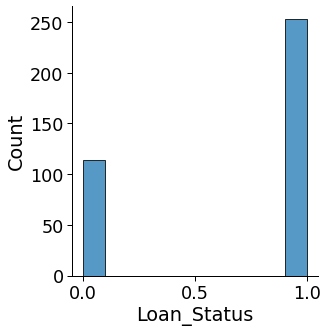

In [114]:
sns.displot(df_test_final.Loan_Status)

In [115]:
#if we want to predict without resampling then our second best model is rf8_std

In [116]:
df_test = df.iloc[614:, :-1]
rf8_std.fit(X, y)
y_pred = rf8_std.predict(df_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [117]:
y_pred = pd.Series(y_pred)
y_pred.value_counts()


1    296
0     71
dtype: int64

<AxesSubplot:ylabel='count'>

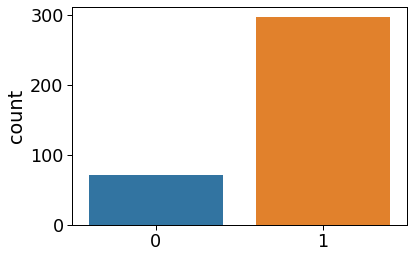

In [118]:
sns.countplot(y_pred)